In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
dataset = pd.read_csv('./data/matches_bets.csv')
#Include a column called winner where if home_team_ goal is bigger than away_team_goal result is 'H'
#if home_team_ goal is equal to away_team_goal result is 'D', else is 'A'
dataset['winner'] = dataset.apply(lambda row: 0 if row['home_team_goal'] > row['away_team_goal'] else (1 if row['home_team_goal'] == row['away_team_goal'] else 2), axis=1)
dataset.head()

,id,country_name,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal,home_win_odds_1,draw_odds_1,away_win_odds_1,winner
0,4769,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,AJ Auxerre,FC Nantes,2,1,2.10,3.1,3.75,0
1,4770,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,Girondins de Bordeaux,SM Caen,2,1,1.57,3.6,6.50,0
2,4771,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,Le Havre AC,OGC Nice,1,0,2.30,3.0,3.40,0
3,4772,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,Le Mans FC,FC Lorient,0,1,2.10,3.1,3.80,2
4,4774,France,France Ligue 1,2008/2009,2008-08-09 00:00:00,AS Monaco,Paris Saint-Germain,1,0,2.40,3.1,3.10,0


In [161]:
#remove the column id, home_team_goal and away_team_goal from the dataframe
dataset = dataset.drop(['id', 'home_team_goal', 'away_team_goal'], axis=1)
# separate the rows from the season 2015/2016 into a different dataframe and remove them from the original dataset
#validation = dataset[dataset['season'] == '2015/2016']
#dataset = dataset[dataset['season'] != '2015/2016']
#split the dataset into X and y where y are 'home_win_odds_1', 'draw_odds_1' and 'away_win_odds_1'
X = dataset.drop('winner', axis=1)
y = dataset['winner']

In [162]:
X.dtypes

country_name        object
league_name         object
season              object
date                object
home_team           object
away_team           object
home_win_odds_1    float64
draw_odds_1        float64
away_win_odds_1    float64
dtype: object

In [163]:
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is a pandas DataFrame
# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
X_encoded = X.copy()
for column in ['country_name', 'league_name', 'season', 'date', 'home_team', 'away_team']:
    X_encoded[column] = label_encoder.fit_transform(X[column])

In [164]:
X_encoded.head(10)

,country_name,league_name,season,date,home_team,away_team,home_win_odds_1,draw_odds_1,away_win_odds_1
0,2,2,0,0,7,78,2.10,3.1,3.75
1,2,2,0,0,100,203,1.57,3.6,6.50
2,2,2,0,0,130,154,2.30,3.0,3.40
3,2,2,0,0,131,76,2.10,3.1,3.80
4,2,2,0,0,8,161,2.40,3.1,3.10
5,2,2,0,0,9,128,2.15,3.1,3.60
6,2,2,0,0,221,156,2.70,3.0,2.80
7,2,2,0,0,83,103,1.91,3.2,4.33
8,2,2,0,0,242,10,2.40,3.1,3.10
9,7,7,0,0,89,178,6.50,4.0,1.50


In [165]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                    test_size = 0.1)

# Random Forest

In [166]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=1)

In [167]:
Y_pred = classifier.predict(X_test)

In [168]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

([<matplotlib.axis.XTick at 0x1b546914f10>,
 [Text(0.5, 0, 'home wins'), Text(1.5, 0, 'draw'), Text(2.5, 0, 'away wins')])

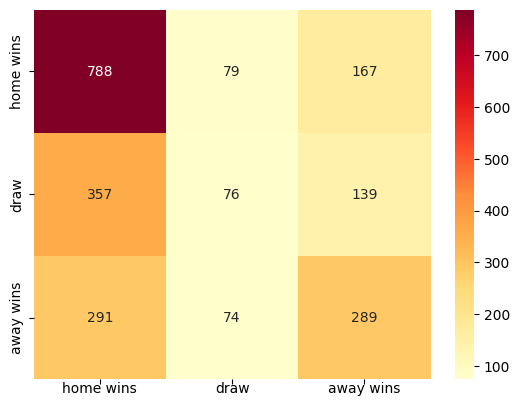

In [169]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')
#replace heatmap labels for 'home wins' if the value is 0, 'draw' if its 1 and 'away wins' if its 2
plt.yticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')
plt.xticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')

In [170]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1034
           1       0.33      0.13      0.19       572
           2       0.49      0.44      0.46       654

    accuracy                           0.51      2260
   macro avg       0.46      0.45      0.43      2260
weighted avg       0.48      0.51      0.47      2260



In [172]:

#get mean accuracy of 5 runs of random forest classifier for different percentages of split train/test
# plot mean accuracy over test percentage with standard deviation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# fit the model
mean_results = []
std = []
for test_percentage in [0.2, 0.4, 0.6, 0.8]:
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                    test_size = test_percentage)
    results = []
    for _ in range(5):
        classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             n_jobs=-1)
        #fit model
        classifier.fit(X_train, y_train)
        #calculate accuracy
        results.append(classifier.score(X_test, y_test))
    
    results = np.array(results)
    mean_results.append(results.mean())
    std.append(results.std())


Text(0, 0.5, 'Mean accuracy')

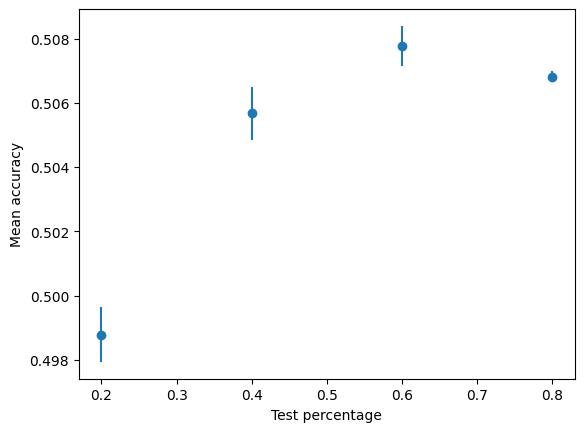

In [173]:
# plot mean accuracy with std over test percentage
plt.errorbar([0.2, 0.4, 0.6, 0.8], mean_results, yerr=std, fmt='o')
plt.xlabel('Test percentage')
plt.ylabel('Mean accuracy')

# XGBoost

In [ ]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

classifier = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, objective='multi:softmax', n_jobs=-1)
classifier.fit(X_train, y_train, )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [132]:
Y_pred = classifier.predict(X_test)

In [133]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

([<matplotlib.axis.XTick at 0x1b5848ab040>,
 [Text(0.5, 0, 'home wins'), Text(1.5, 0, 'draw'), Text(2.5, 0, 'away wins')])

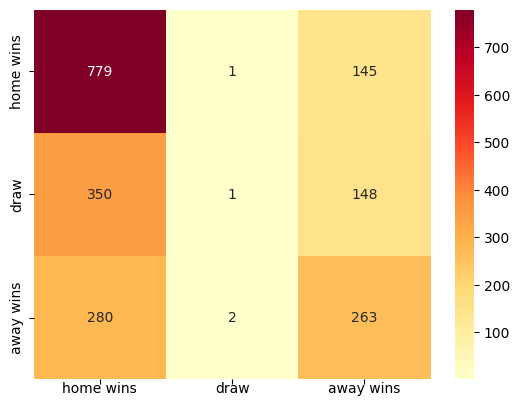

In [134]:
sns.heatmap(cm, annot=True,fmt='d', cmap='YlOrRd')
#replace heatmap labels for 'home wins' if the value is 0, 'draw' if its 1 and 'away wins' if its 2
plt.yticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')
plt.xticks([0.5,1.5,2.5],['home wins','draw','away wins'],va='center')

In [135]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.84      0.67       925
           1       0.25      0.00      0.00       499
           2       0.47      0.48      0.48       545

    accuracy                           0.53      1969
   macro avg       0.43      0.44      0.38      1969
weighted avg       0.45      0.53      0.45      1969



In [174]:

#get mean accuracy of 5 runs of random forest classifier for different percentages of split train/test
# plot mean accuracy over test percentage with standard deviation
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier

# fit the model
mean_results = []
std = []
for test_percentage in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                    test_size = test_percentage)
    results = []
    for _ in range(5):
        classifier = XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=3, objective='multi:softmax', n_jobs=-1)
        #fit model
        classifier.fit(X_train, y_train)
        #calculate accuracy
        results.append(classifier.score(X_test, y_test))
        
    results = np.array(results)
    mean_results.append(results.mean())
    std.append(results.std())

Text(0, 0.5, 'Mean accuracy')

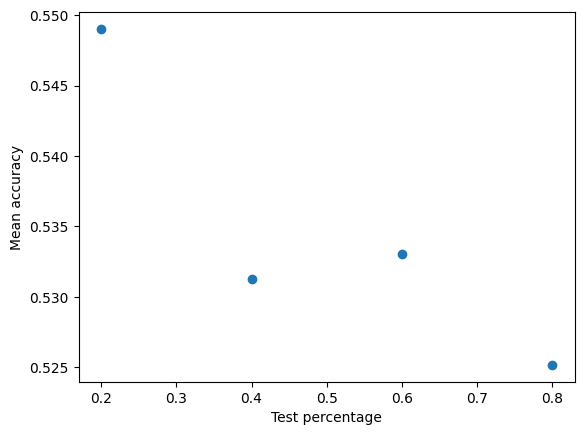

In [175]:
# plot mean accuracy with std over test percentage
plt.errorbar([0.2, 0.4, 0.6, 0.8], mean_results, yerr=std, fmt='o')
plt.xlabel('Test percentage')
plt.ylabel('Mean accuracy')